In [13]:
# Import the necessary libraries
import pandas as pd

In [15]:
# Load the data and display the first few rows
data = pd.read_csv('facts.csv')
data.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


In [17]:
# Check the dimensions of the DataFrame (number of rows and columns)
data.shape

(261, 11)

In [18]:
# Get summary statistics of the numerical columns
data.describe()

,id,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
count,261.00000,2.490000e+02,2.460000e+02,243.000000,2.420000e+02,236.000000,228.000000,228.000000,223.000000
mean,131.00000,5.550935e+05,5.227026e+05,19067.592593,2.659933e+07,1.200975,19.328553,7.821272,3.433946
std,75.48841,1.737041e+06,1.654027e+06,89559.192992,1.551638e+08,0.901470,9.465795,2.878720,4.406689
min,1.00000,0.000000e+00,0.000000e+00,0.000000,-1.333445e+09,0.000000,6.650000,1.530000,0.000000
25%,66.00000,7.600000e+02,7.532500e+02,0.000000,2.846782e+05,0.427500,11.587500,5.917500,0.355000
50%,131.00000,5.678500e+04,5.900950e+04,440.000000,5.069458e+06,1.050000,16.555000,7.525000,1.910000
75%,196.00000,3.420000e+05,3.259935e+05,6555.000000,1.812927e+07,1.875000,24.380000,9.435000,4.945000
max,261.00000,1.709824e+07,1.637774e+07,891163.000000,1.367485e+09,4.020000,45.450000,14.890000,22.390000


In [19]:
# Check for missing values in the data
data.isnull().sum()

id                    0
code                  0
name                  0
area                 12
area_land            15
area_water           18
population           19
population_growth    25
birth_rate           33
death_rate           33
migration_rate       38
dtype: int64

In [20]:
# Fill missing values with the mean
data['area'].fillna(data['area'].mean(), inplace=True)
data['area_land'].fillna(data['area_land'].mean(), inplace=True)
data['area_water'].fillna(data['area_water'].mean(), inplace=True)
data['population'].fillna(data['population'].mean(), inplace=True)
data['population_growth'].fillna(data['population_growth'].mean(), inplace=True)
data['birth_rate'].fillna(data['birth_rate'].mean(), inplace=True)
data['death_rate'].fillna(data['death_rate'].mean(), inplace=True)
data['migration_rate'].fillna(data['migration_rate'].mean(), inplace=True)

In [61]:
# Remove the outlier row
data = data[:-1]

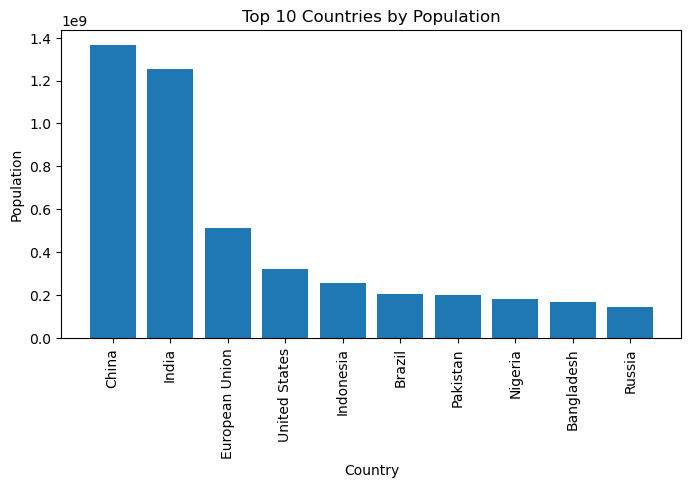

In [24]:
# Plot a bar chart to show the top 10 countries with the highest population
import matplotlib.pyplot as plt

top_10_population = data.nlargest(10, 'population')
plt.figure(figsize=(8, 4))
plt.bar(top_10_population['name'], top_10_population['population'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries by Population')
plt.xticks(rotation=90)
plt.show()

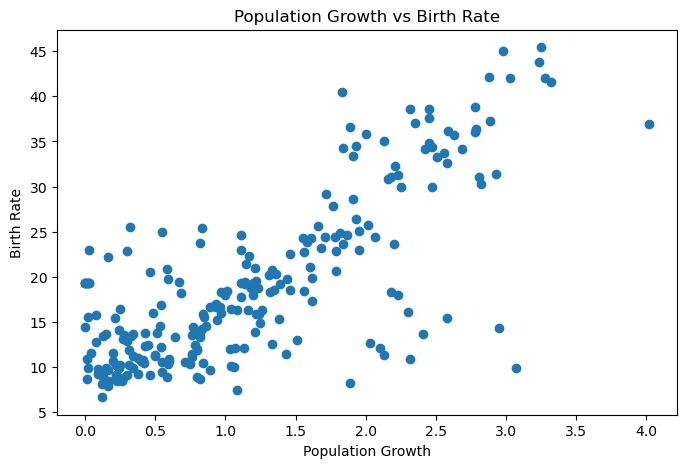

In [62]:
# Create a scatter plot to visualize the relationship between population growth and birth rate

plt.figure(figsize=(8, 5))
plt.scatter(data['population_growth'], data['birth_rate'])
plt.xlabel('Population Growth')
plt.ylabel('Birth Rate')
plt.title('Population Growth vs Birth Rate')
plt.show()


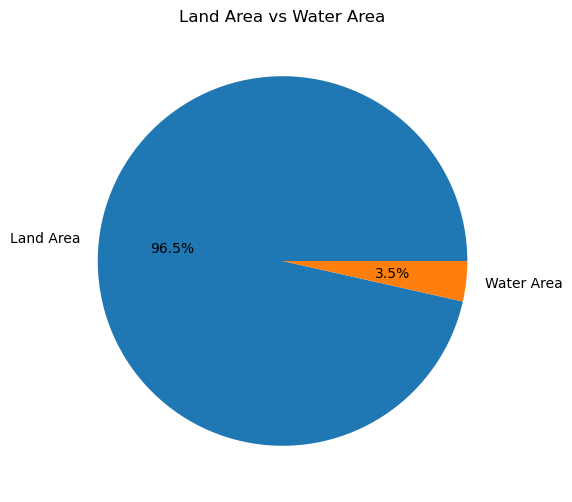

In [28]:
# Generate a pie chart to illustrate the distribution of land area and water area

area_labels = ['Land Area', 'Water Area']
area_sizes = [data['area_land'].sum(), data['area_water'].sum()]
plt.figure(figsize=(6, 6))
plt.pie(area_sizes, labels=area_labels, autopct='%1.1f%%')
plt.title('Land Area vs Water Area')
plt.show()


In [64]:
# Calculate the total area (land + water) for each country and add it as a new column
data['total_area'] = data['area_land'] + data['area_water']

In [65]:
# # Sort the data by total area in descending order
sorted_data = data.sort_values('total_area', ascending=False)

In [66]:
# Filter the data for top 10 countries by total area
top_10_countries = sorted_data.head(10)

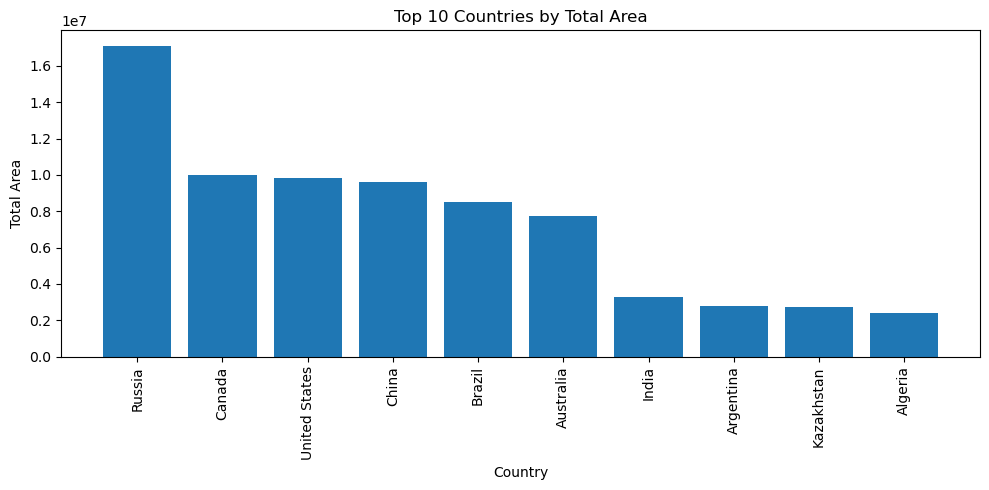

In [67]:
# Create the bar plot for top 10 countries
plt.figure(figsize=(10, 5))
plt.bar(top_10_countries['name'], top_10_countries['total_area'])
plt.xlabel('Country')
plt.ylabel('Total Area')
plt.title('Top 10 Countries by Total Area')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [35]:
# Calculate population density
data['population_density'] = data['population'] / data['area_land']

In [36]:
# Find the country with the highest population density
country_highest_density = data.loc[data['population_density'].idxmax(), 'name']
print("Country with the highest population density:", country_highest_density)

Country with the highest population density: Holy See (Vatican City)


In [37]:
# Sort the data by population density in descending order
sorted_data = data.sort_values('population_density', ascending=False)

In [38]:
# Filter the data for top 10 countries by population density
top_10_countries = sorted_data.head(10)

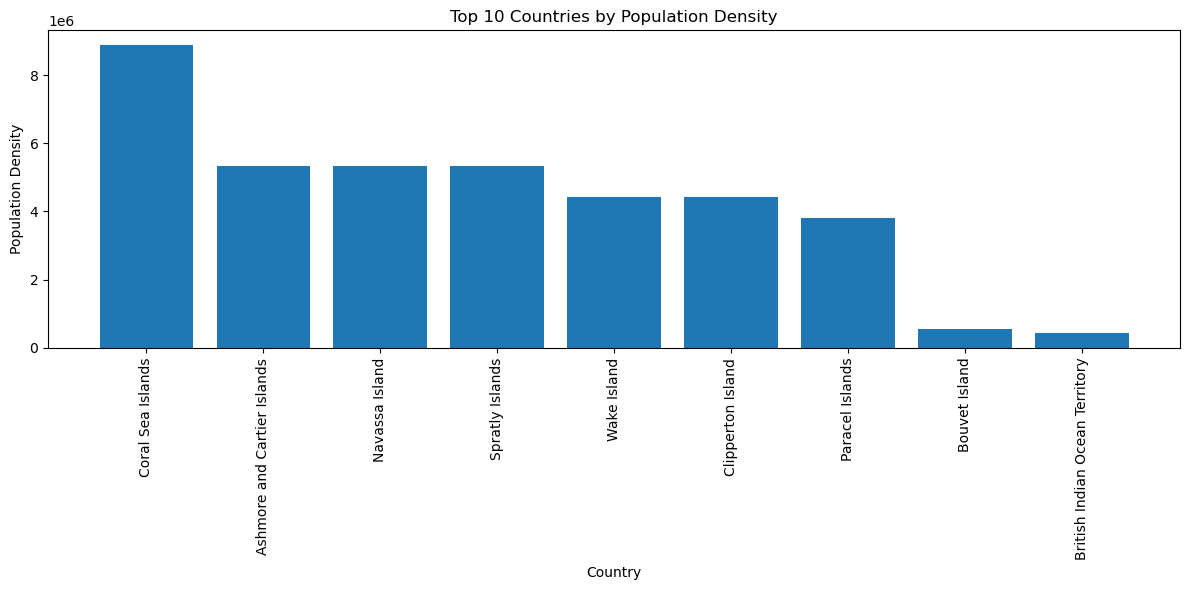

In [39]:
# Create the bar plot for top 10 countries by population density
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['name'], top_10_countries['population_density'])
plt.xlabel('Country')
plt.ylabel('Population Density')
plt.title('Top 10 Countries by Population Density')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

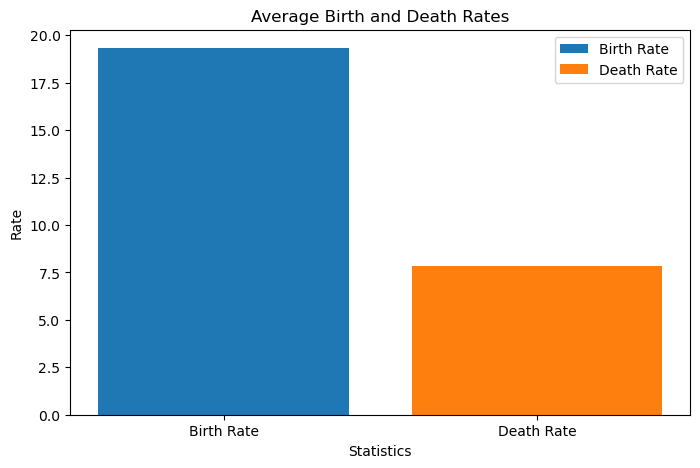

In [44]:
# Birth and Death Rates Analysis
# Bar plot of average birth and death rates
avg_birth_rate = data['birth_rate'].mean()
avg_death_rate = data['death_rate'].mean()

plt.figure(figsize=(8, 5))
plt.bar(['Birth Rate'], [avg_birth_rate], label='Birth Rate')
plt.bar(['Death Rate'], [avg_death_rate], label='Death Rate')
plt.xlabel('Statistics')
plt.ylabel('Rate')
plt.title('Average Birth and Death Rates')
plt.legend()
plt.show()

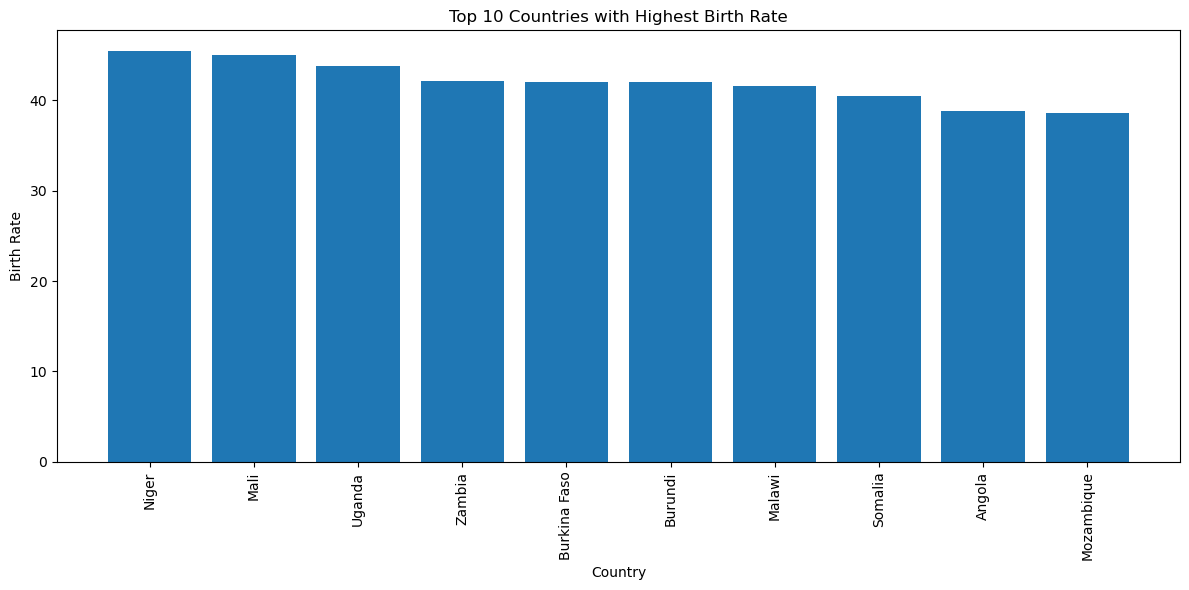

In [45]:
# top 10 countries with the highest birth rate
# Sort the data by birth rate in descending order
top_birth_rate_countries = data.nlargest(10, 'birth_rate')

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_birth_rate_countries['name'], top_birth_rate_countries['birth_rate'])
plt.xlabel('Country')
plt.ylabel('Birth Rate')
plt.title('Top 10 Countries with Highest Birth Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


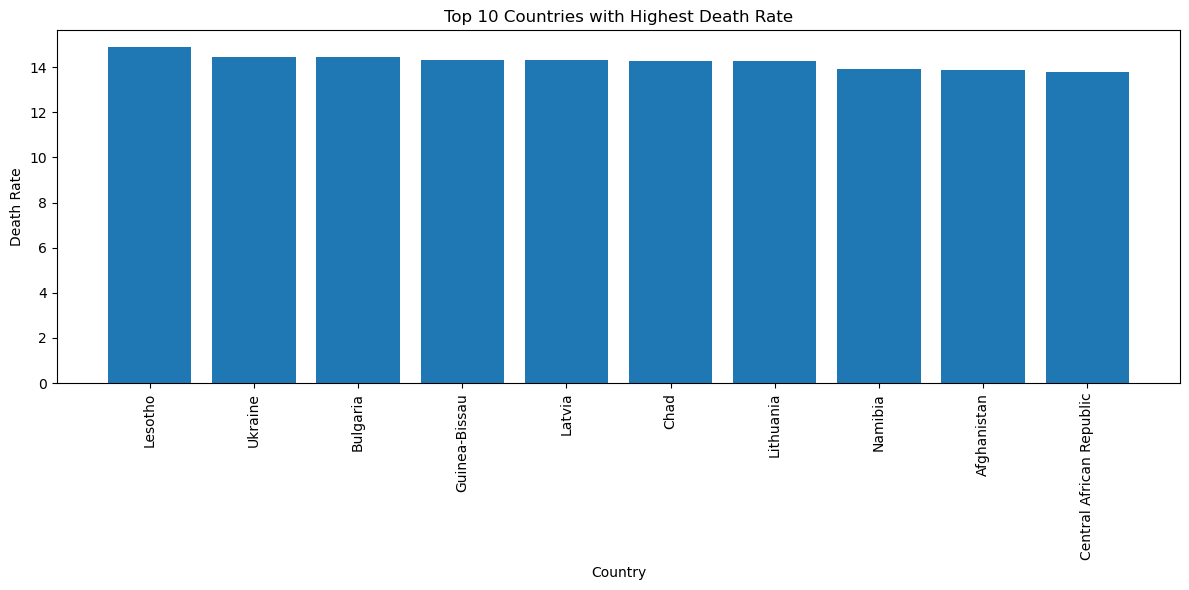

In [46]:
# top 10 countries with the highest death rate
# Sort the data by death rate in descending order
top_death_rate_countries = data.nlargest(10, 'death_rate')

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_death_rate_countries['name'], top_death_rate_countries['death_rate'])
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.title('Top 10 Countries with Highest Death Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [54]:
# Population growth rates analysis
# Remove the outlier row
data = data[:-1]

# Calculate the annual population growth rate for each country
data.loc[:, 'population_growth_rate'] = (data.loc[:, 'population_growth'] / 100) * data.loc[:, 'population']


In [55]:
# Sort the data by the population growth rate
sorted_data = data.sort_values('population_growth_rate')

In [56]:
# Identify the countries with the highest and lowest population growth rates
country_highest_growth = sorted_data['name'].tail(1).values[0]
country_lowest_growth = sorted_data['name'].head(1).values[0]
print("Country with the highest population growth rate:", country_highest_growth)
print("Country with the lowest population growth rate:", country_lowest_growth)

Country with the highest population growth rate: India
Country with the lowest population growth rate: Cocos (Keeling) Islands


In [58]:
# Sort the data by population growth rate in descending order
sorted_data = data.sort_values('population_growth_rate', ascending=False)

In [59]:
# Select the top 10 countries with the highest population growth rates
top_10_countries = sorted_data.head(10)

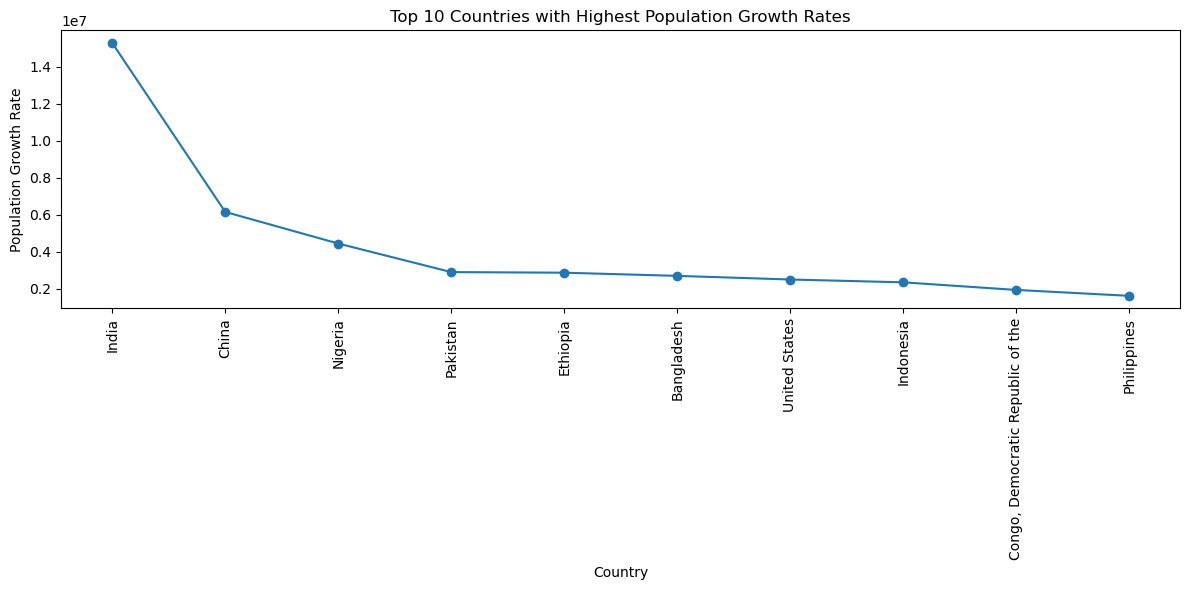

In [60]:
# Create line chart or area plot for population growth rates of the top 10 countries
plt.figure(figsize=(12, 6))
plt.plot(top_10_countries['name'], top_10_countries['population_growth_rate'], marker='o')
plt.xlabel('Country')
plt.ylabel('Population Growth Rate')
plt.title('Top 10 Countries with Highest Population Growth Rates')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()